# Plotting of sleep drive correlates

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import os
import scipy.io
import scanpy as sc
import anndata as ad
import seaborn as sns
from statsmodels.stats import multitest
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=120)

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 8.1.0
backcall            0.1.0
cached_property     1.5.2
cffi                1.15.0
cloudpickle         2.0.0
constants           NA
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.2
dask                2022.02.0
dateutil            2.8.1
decorator           4.4.1
fsspec              2022.3.0
h5py                3.6.0
highs_wrapper       NA
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.2
jinja2              2.10.3
joblib              1.0.0
kiwisolver          1.3.1
llvmlite            0.35.0
markupsafe          1.1.1
matplotlib          3.5.3
more_itertools      NA
mpl_toolkits        NA
natsort             8.0.2
numba               0.52.0
numexpr             2.8.1
numpy               1.19.5
packaging           21.3
pandas              1.3.4
parso               0.5.2
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      

# 1. load adata and correlation matrices and filter it for significant genes by cell type, also remove batch effect genes

In [3]:
os.chdir('/lustre1/project/stg_00003/groups/SHLI/')

In [4]:
adata = sc.read_h5ad('adata_08082022.h5ad')

In [5]:
with open('/lustre1/project/stg_00003/groups/SHLI/PTM/22122022_ct_corrs_Cluster_ID_res8_080822.pickle', 'rb') as fh:
    ct_corrs = pickle.load(fh)

In [6]:
cluster_dict = dict.fromkeys(adata.obs['Cluster_ID_res8_080822'], "clusters")

In [9]:
#clusters with no cells in one of the conditions Cluster_ID_res8.0_070722 or Cluster_ID_res8_080822
no_cells_list = ['13', '193', '117', '125', '205', '202', '3', '195', '5', '188', '208', '6', '25', '209', '75', '103', '21', '15', '2']

In [10]:
low_padj = {}

In [11]:
for cell_type in cluster_dict.keys():
    if cell_type in no_cells_list: continue
    corrs = ct_corrs[cell_type]
    low = corrs[corrs['p-adj'] <= 0.05]
    low_sorted = low.sort_values('Pearson_r2', ascending=True).index
    print(f'{cell_type} has {low.shape[0]} genes p-adj < 0.05')
    low_padj[cell_type] = low_sorted

nonPAM has 109 genes p-adj < 0.05
201 has 29 genes p-adj < 0.05
133 has 11 genes p-adj < 0.05
90 has 46 genes p-adj < 0.05
34 has 10 genes p-adj < 0.05
80 has 62 genes p-adj < 0.05
y has 0 genes p-adj < 0.05
4 has 0 genes p-adj < 0.05
57 has 0 genes p-adj < 0.05
EG_2 has 43 genes p-adj < 0.05
9 has 2 genes p-adj < 0.05
32 has 49 genes p-adj < 0.05
36 has 0 genes p-adj < 0.05
138 has 0 genes p-adj < 0.05
28 has 0 genes p-adj < 0.05
143 has 0 genes p-adj < 0.05
46 has 0 genes p-adj < 0.05
30 has 0 genes p-adj < 0.05
126 has 51 genes p-adj < 0.05
130 has 82 genes p-adj < 0.05
26 has 48 genes p-adj < 0.05
ab has 0 genes p-adj < 0.05
97 has 0 genes p-adj < 0.05
196 has 74 genes p-adj < 0.05
51 has 0 genes p-adj < 0.05
10 has 0 genes p-adj < 0.05
123 has 1 genes p-adj < 0.05
56 has 19 genes p-adj < 0.05
43 has 2 genes p-adj < 0.05
29 has 6 genes p-adj < 0.05
77 has 19 genes p-adj < 0.05
adPN has 0 genes p-adj < 0.05
55 has 0 genes p-adj < 0.05
38 has 0 genes p-adj < 0.05
35 has 0 genes p-adj

In [12]:
df = pd.DataFrame.from_dict(low_padj, orient = "index").sort_index().stack().reset_index(level=1,drop=True).reset_index()
df

,index,0
0,0,CG11208
1,0,RhoGEF3
2,1,GlcAT-I
3,1,CG30428
4,1,Rx
...,...,...
5369,nonPAM,Lsm11
5370,nonPAM,galectin
5371,nonPAM,CG17359
5372,ring_A,Ranbp16


In [13]:
df.columns = ['cluster', 'gene']

In [14]:
batch_effect_genes = pd.read_excel('/lustre1/project/stg_00003/groups/SHLI/batch_effects.xlsx', sheet_name = "all")

In [15]:
batch_effect_genes_list = list(batch_effect_genes["gene"])
batch_effect_genes_list

['GstE4',
 'cato',
 'CG3117',
 'CR45600',
 'CG31157',
 'CG6912',
 'fw',
 'sdic3',
 'CR45175',
 'CR44841',
 'CG30428',
 'RhoGEF2',
 'Rs1',
 'CG9975',
 'CG7091',
 'Hsc70-2',
 'CG1678',
 'CG34220',
 'CG34324',
 'CG14125',
 'Muc68D',
 'Eh',
 'CR41609',
 'CG14645',
 'CG3906',
 'Peritrophin-15a',
 'CG11672',
 'Cyp4g1',
 'CG4783',
 'CG5399',
 'alrm',
 'nSyb',
 'CadN',
 'brp',
 'noe',
 'Hug',
 'Trissin',
 'Dsk',
 'CR40469',
 'mt:srRNA',
 'Ms',
 'Ilp2',
 'CG12239']

In [16]:
df_nobatch = df[~df['gene'].isin(batch_effect_genes_list)]

In [17]:
df_nobatch_len=pd.DataFrame.from_dict(df_nobatch['cluster'].value_counts().to_dict(), orient="index").reset_index(level=0)
df_nobatch_len.columns = ['cluster', 'n_HAG']
df_nobatch_len

,cluster,n_HAG
0,85,148
1,109,139
2,190,123
3,dFB,121
4,Oct,119
...,...,...
122,42,1
123,184,1
124,129,1
125,128,1


In [18]:
# find those clusters that have 0 HAGs but for which the template matching did work, i.e. the generation of the input matrix worked, so we can add them to the list

In [19]:
all_clusters_list = list(set(adata.obs['Cluster_ID_res8_080822'].values.tolist()))
len(all_clusters_list)

214

In [20]:
HAG_nobatch = list(df_nobatch_len['cluster'])
len(HAG_nobatch)

127

In [21]:
combined_HAG = HAG_nobatch + no_cells_list
len(combined_HAG)

146

In [22]:
no_HAG_df = pd.DataFrame(list(set(all_clusters_list) - set(combined_HAG)))
len(no_HAG_df)

68

In [23]:
no_HAG_df['cluster']=no_HAG_df.index
no_HAG_df.columns = ['cluster', 'n_HAG']
no_HAG_df['n_HAG'] = 0
no_HAG_df

,cluster,n_HAG
0,163,0
1,67,0
2,121,0
3,68,0
4,10,0
...,...,...
63,60,0
64,76,0
65,36,0
66,39,0


In [24]:
HAG = pd.concat([df_nobatch_len, no_HAG_df])
HAG['n_HAG_sqrt'] = np.sqrt(HAG['n_HAG'])
HAG

,cluster,n_HAG,n_HAG_sqrt
0,85,148,12.165525
1,109,139,11.789826
2,190,123,11.090537
3,dFB,121,11.000000
4,Oct,119,10.908712
...,...,...,...
0,60,0,0.000000
0,76,0,0.000000
0,36,0,0.000000
0,39,0,0.000000


In [25]:
HAG_dict = dict(zip(HAG.cluster, HAG.n_HAG_sqrt))

In [26]:
adata.obs['n_HAG_sqrt'] = list(adata.obs['Cluster_ID_res8_080822'])

In [27]:
for k, v in HAG_dict.items():
     adata.obs['n_HAG_sqrt'].replace(k, v, inplace=True)

In [28]:
adata.obs = adata.obs.astype({"n_HAG_sqrt": int})
adata.obs

,Age,Condition,Genotype,Run,Singlet,Sleep_Stage,Treatment,doublet_scores,n_counts,n_genes,...,all_res8,HRG_sqrt,CRG_sqrt,Cluster_ID_res8_240622,Cluster_ID_res8_070722,Cluster_ID_res8_080822,ring_3clusters,neuron_glia,neuron_glia_pos,n_HAG_sqrt
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGAGGCAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 8 wake,line_88,20180419,True,ZT_8,Wake,0.042720,7702.0,2211,...,nonPAM,10.440307,1.914854,nonPAM,nonPAM,nonPAM,NaN,neuron,neuron,10
AAACCCAAGGGTCACA-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.027581,8043.0,2246,...,201,5.385165,0.000000,201,201,201,NaN,neuron,neuron,5
AAACCCACAAATACAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 8 wake stimulation,line_313,20180419,True,ZT_8,Wake,0.053623,655.0,411,...,ALG-,3.316625,0.000000,133,133,133,NaN,glia,133,3
AAACCCACAAGCACCC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.027581,3774.0,1492,...,90,6.782330,4.281744,90,90,90,NaN,neuron,neuron,6
AAACCCACAAGTGGAC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.058220,15036.0,3112,...,34,3.162278,4.358899,34,34,34,NaN,neuron,neuron,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTGTAAGC-fcae49__S3_10x_240920-20200924,7 days,ZT 8 gab,line_287,20200924,True,ZT_8,Sleep,0.036336,1589.0,797,...,138,0.000000,0.000000,138,138,138,NaN,neuron,neuron,0
TTTGTTGAGGAACTCG-fcae49__S3_10x_240920-20200924,6-8 days,ZT 8 gab,line_441,20200924,True,ZT_8,Sleep,0.010993,1490.0,809,...,67,0.000000,5.972158,67,67,67,NaN,neuron,neuron,0
TTTGTTGCAACCAATC-fcae49__S3_10x_240920-20200924,7 days,ZT 8 wake,line_379,20200924,True,ZT_8,Wake,0.012016,4453.0,1483,...,26,6.928203,6.952218,26,26,26,NaN,neuron,neuron,6


In [29]:
# we decide which cells are considered homeostatically affected by thresholding based on average of HAGs across clusters
threshold_HAG_cell = HAG['n_HAG_sqrt'].mean()
threshold_HAG_cell

3.719804274583138

In [30]:
# creating new column in adata to indicate whether a cell type falls into the HAG bucket or not
adata.obs['n_HAG_color']= np.where((adata.obs['n_HAG_sqrt'])>threshold_HAG_cell, "1", "0")

In [31]:
# we are also excluding cell types that couldn't compute the input matrix (ct_mms), i.e. there are no cells in one of the conditions as well as those cell types expressing <500 genes
excluded_cells = ['13', '193', '117', '125', '205', '202', '3', '195', '5', '188', '208', '6', '25', '209', '75', '103', '21', '15', '2', '133', '4', '68']

# generate tSNE highlighting cells classified as homeostatically affected cells

In [30]:
sc.set_figure_params(dpi=120, dpi_save=300, frameon=False, vector_friendly=False, fontsize=0, figsize=(5, 4.5), format='png')

In [ ]:
# overlaying two tsne with cells greyed out that were not tested for template matching because they don't have cells in all conditions

In [ ]:
fig, ax = plt.subplots()
nan_cells = np.array(
    [True if adata.obs.loc[x, 'Cluster_ID_res8_080822'] in excluded_cells else False for x in adata.obs_names ]
)
sc.pl.tsne(adata[~nan_cells], color='n_HAG_color', palette=['lightgrey', '#1f77b4'], ax=ax, size=1)
#, save="_02122022_sleepdrivecorrelates.png"

/data/leuven/334/vsc33403/jupyter/envs/jupyter/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


# generate clustermaps showing gene expression across behavioural conditions

In [32]:
with open('/lustre1/project/stg_00003/groups/SHLI/PTM/12042022_ct_mms.pickle', 'rb') as fh:
    ct_mms = pickle.load (fh)

Text(207.43106060606058, 0.5, 'z-score mean expression')

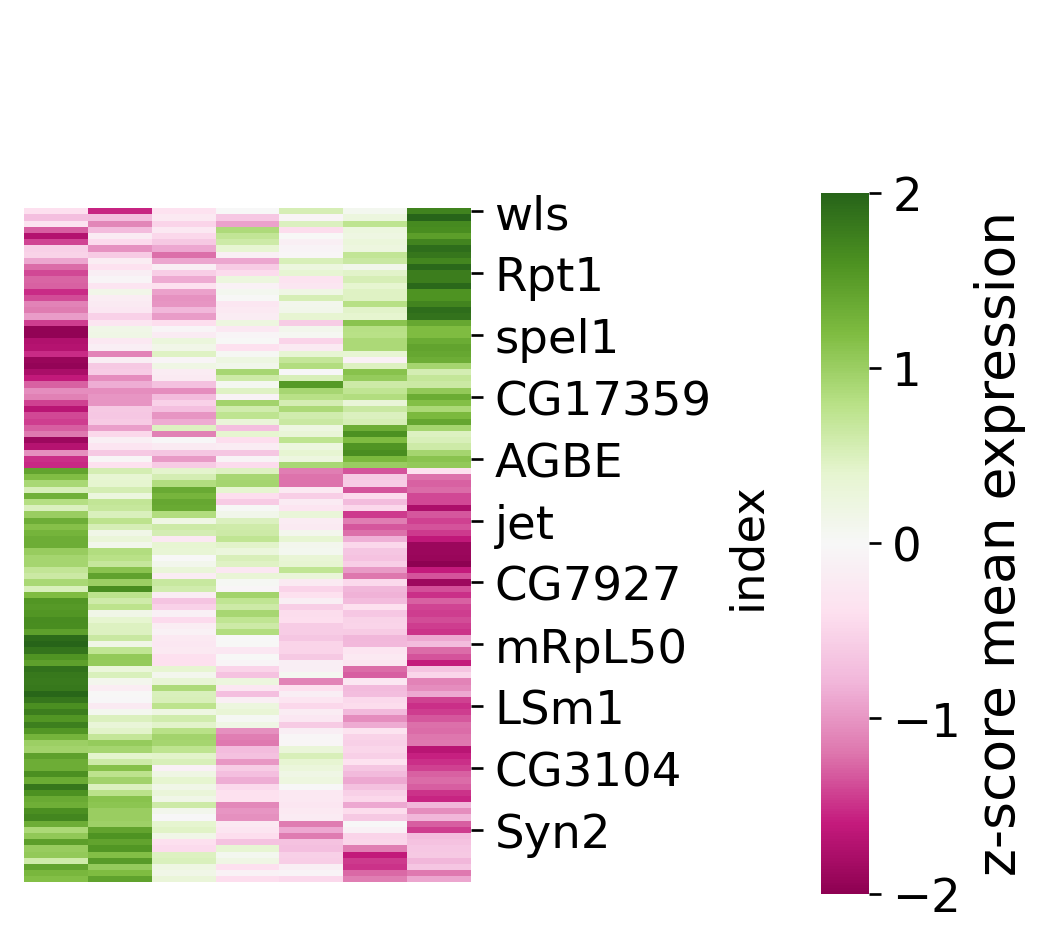

In [36]:
ct = 'nonPAM'

plot=sns.clustermap(ct_mms[ct].loc[low_padj[ct]], 
                    row_cluster=True, 
                    col_cluster=False, 
                    z_score=0, 
                    vmin=-2, 
                    vmax=2,
                    figsize=(4,4),
                   cmap="PiYG",
                   xticklabels=False,
                    cbar_pos=(1, 0.041, .05, .73))
plot.ax_row_dendrogram.set_visible(False)
plot.ax_cbar.set_ylabel('z-score mean expression', size=16)
#plot.savefig('clustermap_nonPAM.pdf')

In [ ]:
# generate 'control' clustermap - expression of nonPAM's sleep drive correlates across conditions for PAM neurons
# first get the order of correlates as they are printed in the nonPAM clustermap, so I can show them next to each other and only need to print the gene names one time

In [38]:
gene_order = plot.dendrogram_row.reordered_ind

In [39]:
ordered_elements = [low_padj['nonPAM'][position] for position in gene_order]
print("Ordered Elements:", ordered_elements)

Ordered Elements: ['wls', 'CG8187', 'CG12084', 'numb', 'CG3714', 'Pp2A-29B', 'Cka', 'Mcr', 'CG33155', 'Uvrag', 'Rpt1', 'DUBAI', 'gcl', 'CG12325', 'Src42A', 'Ercc1', 'CG5850', 'nompB', 'Clp', 'CG10483', 'spel1', 'CG10395', 'CG30069', 'RYBP', 'Brca2', 'Prp19', 'qm', 'CG7222', 'CG10189', 'Jheh3', 'CG17359', 'CG34356', 'rig', 'CG10384', 'galectin', 'l(2)k14710', 'Stam', 'CG32264', 'CG13332', 'msn', 'AGBE', 'Lsm11', 'CG8435', 'GstO1', 'Cda5', 'CG8397', 'CG9953', 'CG8814', 'Iap2', 'Galt', 'jet', 'CG1319', 'TfIIEbeta', 'x16', 'PGAP3', 'D19B', 'CG15237', 'Swip-1', 'CG3907', 'CG6746', 'CG7927', 'CG7376', 'CG15863', 'CG10646', 'CG2064', 'rk', 'ast', 'CG18661', 'Hop', 'CG7787', 'mRpL50', 'CG13293', 'dpr12', 'Dh44-R1', 'CG13398', 'l(3)01239', 'RNaseX25', 'Sap130', 'CG13994', 'Ak6', 'LSm1', 'CG6094', 'mRpS25', 'Hr46', 'oaf', 'Pih1D1', 'CG7099', 'CG3876', 'GlcAT-S', 'CG9305', 'CG3104', 'Tal', 'CG6443', 'CG31814', 'CG11885', 'YL-1', 'sowah', 'fidipidine', 'CG34380', 'CG34370', 'Syn2', 'CG34174', 'bru

In [40]:
reordered_pam = ct_mms['PAM'].loc[ordered_elements]

<AxesSubplot:ylabel='index'>

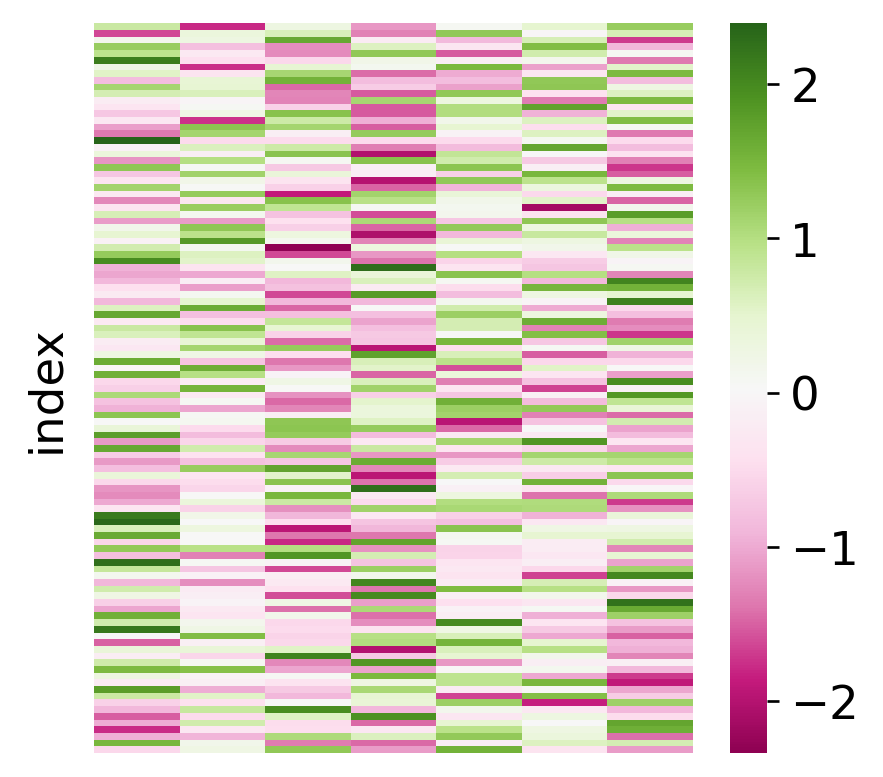

In [43]:
mean_row = np.mean(reordered_pam, axis=1)
std_row = np.std(reordered_pam, axis=1)
z_scores = (reordered_pam.T - mean_row) / std_row

plt.figure(figsize=(4,4))
sns.heatmap(z_scores.T, cmap='PiYG', xticklabels=False, yticklabels=False)

In [34]:
# generate 'control' clustermap - expression of nonPAM's sleep drive correlates across conditions for pseudo-bulk

In [33]:
with open('/lustre1/project/stg_00003/groups/SHLI/PTM/15122023_bulk_mms.pickle', 'rb') as fh:
    meta_matrix = pickle.load (fh)

In [44]:
reordered_bulk = meta_matrix.loc[ordered_elements]

<AxesSubplot:ylabel='index'>

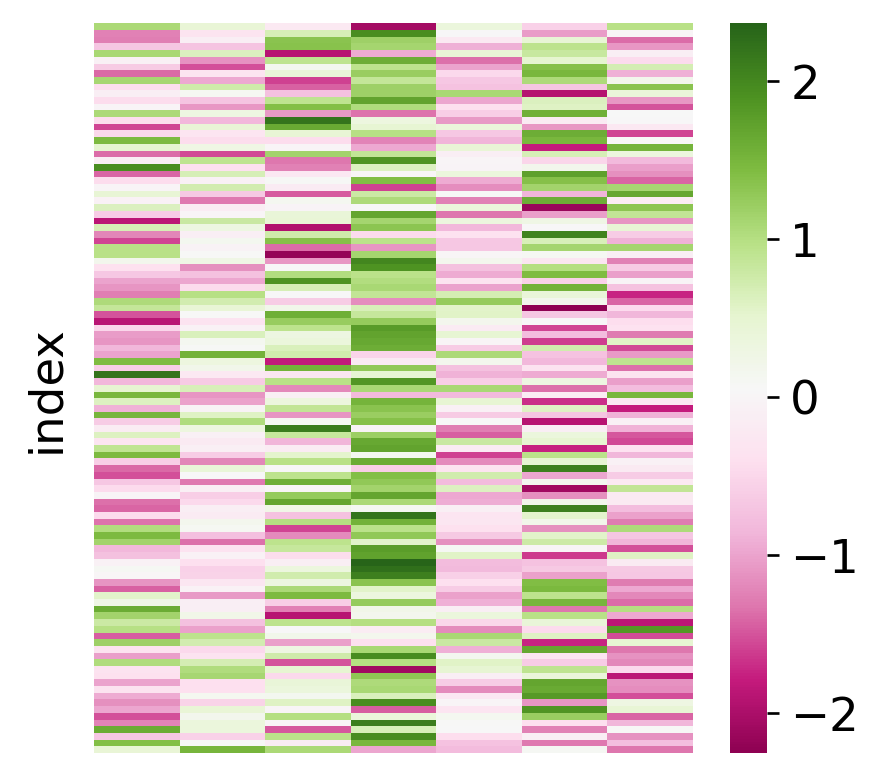

In [45]:
mean_row = np.mean(reordered_bulk, axis=1)
std_row = np.std(reordered_bulk, axis=1)
z_scores = (reordered_bulk.T - mean_row) / std_row

plt.figure(figsize=(4,4))
sns.heatmap(z_scores.T, cmap='PiYG', xticklabels=False, yticklabels=False)